# EDA para el CIFAR10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import cifar10

- Cargo los datos del CIFAR10 y los convierto a un dataset de pandas para facilitar la manipulación de los datos.

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Aplanar las imágenes para crear un DataFrame de Pandas
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convertir los datos en DataFrames de Pandas
df_train = pd.DataFrame(X_train_flat)
df_train['label'] = y_train

df_test = pd.DataFrame(X_test_flat)
df_test['label'] = y_test

# Mostrar las primeras filas del DataFrame de entrenamiento
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1


In [3]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
count,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,130.710740,136.05614,132.553800,130.14036,135.442380,131.853580,131.050440,136.24616,132.581440,131.568860,...,126.778360,125.697080,113.830580,126.564960,125.617420,113.906240,126.639080,125.850300,114.381860,4.50000
std,73.412873,72.90798,80.449751,72.44259,71.901316,79.598048,72.240546,71.67471,79.434675,72.016555,...,63.954763,61.591233,64.894603,64.178427,61.831646,65.212671,64.926283,62.649286,66.077526,2.87231
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,71.000000,77.00000,61.000000,71.00000,78.000000,61.000000,73.000000,79.00000,62.000000,73.000000,...,79.000000,81.000000,64.000000,79.000000,81.000000,64.000000,78.000000,80.000000,63.000000,2.00000
50%,128.000000,135.00000,127.000000,127.00000,135.000000,127.000000,129.000000,136.00000,128.000000,130.000000,...,124.000000,123.000000,106.000000,124.000000,123.000000,106.000000,124.000000,123.000000,106.000000,4.50000
75%,189.000000,195.00000,207.000000,188.00000,193.000000,206.000000,188.000000,194.00000,206.000000,188.000000,...,172.000000,167.000000,157.000000,172.000000,167.000000,157.000000,172.000000,168.000000,158.000000,7.00000
max,255.000000,255.00000,255.000000,255.00000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,9.00000


Tenemos la información de cada píxel de la imagen (hay 32x32x3 = 3072 píxeles) como una característica de la entrada, que en este caso es la imagen con la etiqueta correspondiente.


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3073 entries, 0 to label
dtypes: uint8(3073)
memory usage: 146.5 MB


- Limpio el dataset en caso de que haya elementos vacíos o valores que faltan.


In [5]:
df_train.isna().any().any()

False

False indica que el dataset ya está limpio.

- Histograma de las etiquetas del conjunto de datos CIFAR-10

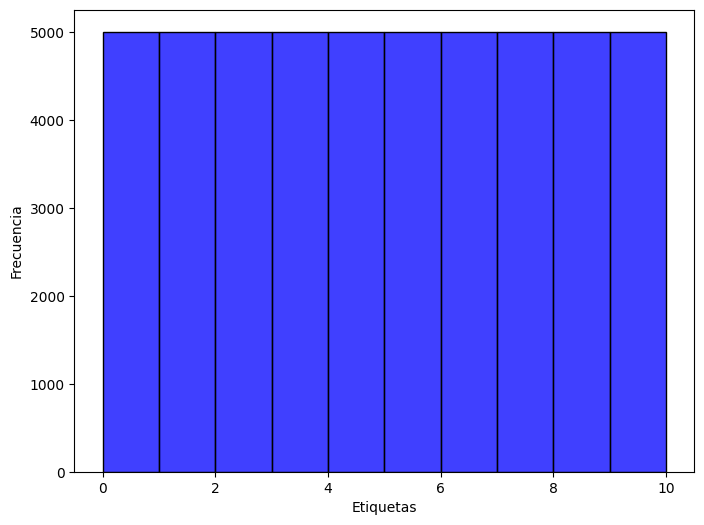

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df_train['label'], bins=range(11), color='blue')
plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.show()

- Visualizo algunas imágenes del conjunto de datos


Primeras 10 imágenes del conjunto de entrenamiento:


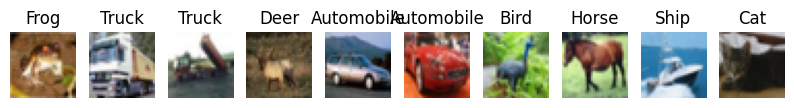


Primeras 10 imágenes del conjunto de prueba:


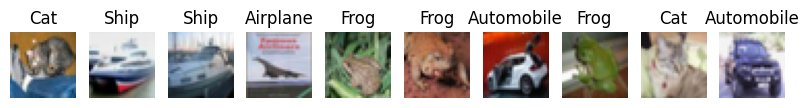

In [7]:
tags = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Función para visualizar algunas imágenes con etiquetas
def plot_images(data, labels, tags, num_images=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(data.iloc[i].values.reshape(32, 32, 3).astype(np.uint8))
        plt.title(tags[int(labels.iloc[i])])  # Corregir el acceso a la etiqueta usando int()
        plt.axis('off')
    plt.show()

# Mostrar las primeras 10 imágenes del conjunto de entrenamiento con etiquetas
print("\nPrimeras 10 imágenes del conjunto de entrenamiento:")
plot_images(df_train.drop('label', axis=1), df_train['label'], tags)

# Mostrar las primeras 10 imágenes del conjunto de prueba con etiquetas
print("\nPrimeras 10 imágenes del conjunto de prueba:")
plot_images(df_test.drop('label', axis=1), df_test['label'], tags)

- Dimensiones de los conjuntos de entrenamiento y testeo

In [8]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


# Principal component analysis (PCA)

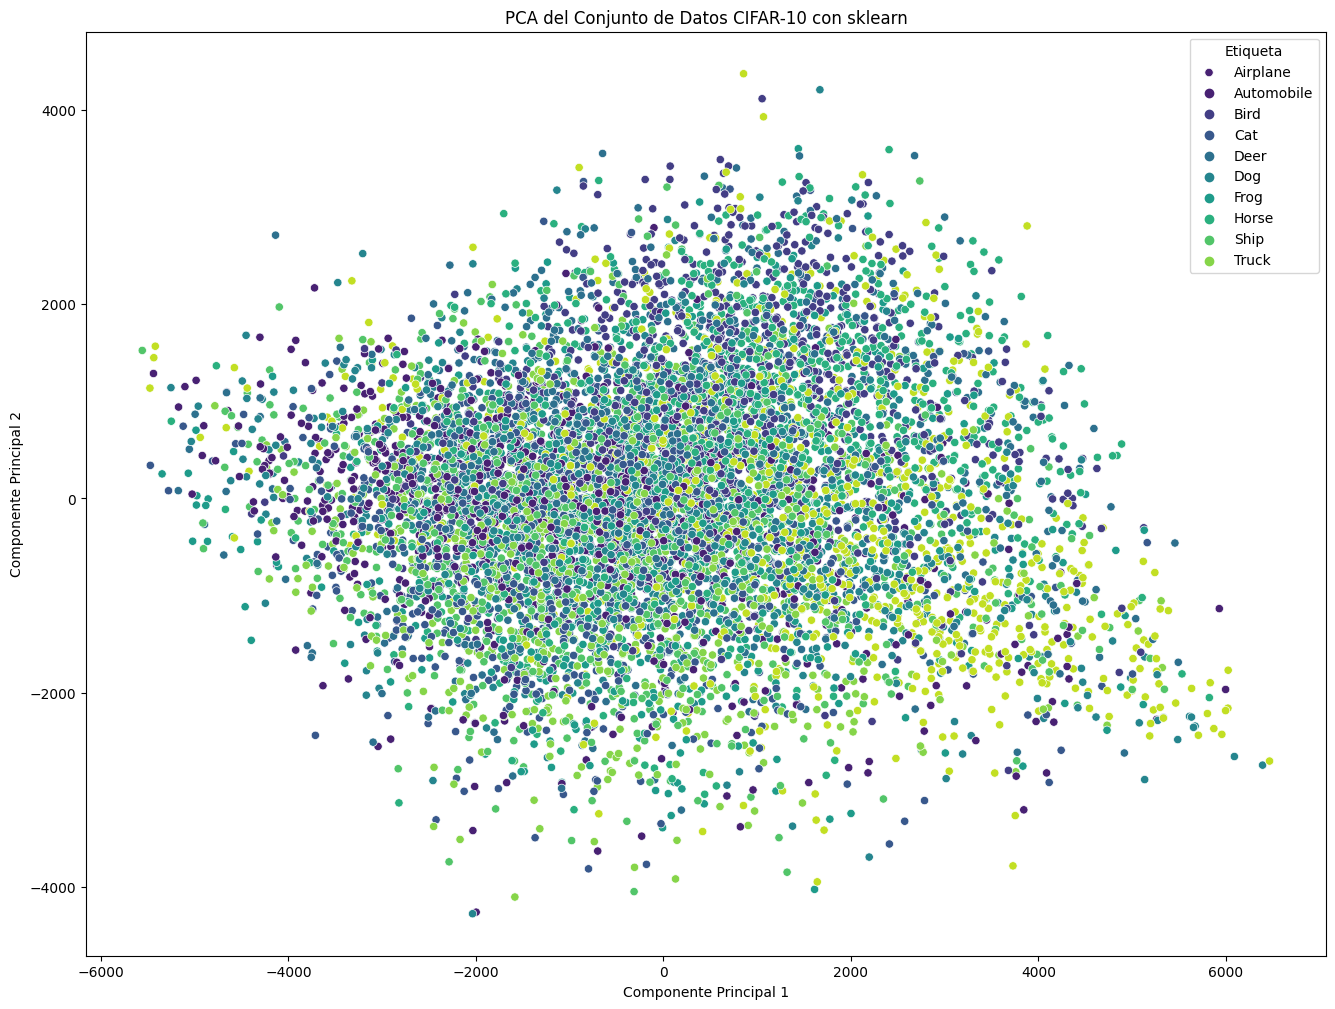

           PC1       PC2
0     0.026567  0.016516
1     0.028130  0.017910
2     0.031356  0.020633
3     0.026544  0.016852
4     0.028089  0.018252
...        ...       ...
3067  0.016670 -0.021873
3068  0.019033 -0.021192
3069  0.016094 -0.022116
3070  0.016957 -0.021222
3071  0.019269 -0.020510

[3072 rows x 2 columns]


In [9]:
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Tomar una muestra del conjunto de datos para PCA
sample_size = 10000
X_sample = X_train_flat[:sample_size]
y_sample = y_train[:sample_size]

# PCA con sklearn
sklearn_pca = sklearnPCA(n_components=2)
X_sklearn_pca = sklearn_pca.fit_transform(X_sample)

tags = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(16, 12))
sns.scatterplot(x=X_sklearn_pca[:, 0], y=X_sklearn_pca[:, 1], hue=[tags[label[0]] for label in y_sample], palette='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Etiqueta', loc='best', labels=tags)
plt.show()

loadings_sklearn = pd.DataFrame(sklearn_pca.components_.T, columns=['PC1', 'PC2'])
print(loadings_sklearn)


- Gráfico de la varianza acumulada en función del número de componentes

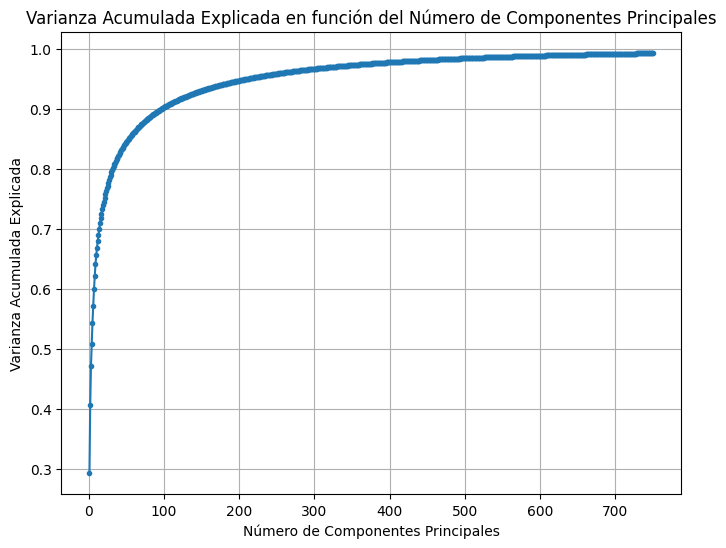

In [12]:
n_components = 750  
sklearn_pca = sklearnPCA(n_components=n_components)
X_sklearn_pca = sklearn_pca.fit_transform(X_sample)

# Varianza explicada por las componentes principales
explained_variance_ratio = sklearn_pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# %%
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', markersize=3)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada en función del Número de Componentes Principales')
plt.grid()
plt.show()